<h1>Twitter sentiment analysis</h1>




In [1]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

<h2>Product Category</h2>
Natural Shampoo

In [2]:
# construct a search query
#query = 'shampoo OR "natural shampoo" OR "organic shampoo" OR "sulfate free shampoo" -filter:retweets'

<h2>Connecting to Twitter API</h2>

In [3]:
# Collect relevant tweets through the Twitter API.
import json
import tweepy as tw

In [4]:
# IMPORTANT: enter proper access credential in config_twitter.py file
import config_twitter

In [5]:
# function to establish an initial API connection, respecting the rate limit
def connect_api_client():
    auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
    auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
    # https://docs.tweepy.org/en/stable/getting_started.html#api
    api = tw.API(auth, wait_on_rate_limit=True)
    try:
        # returns False if credentials could not be verified
        # https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
        api.verify_credentials()
        user = api.verify_credentials()
        if not user:
            raise("Credentials could not be verified: Please check config.py")
        print(f"Connected to Twitter API as {user.name}")
    except Exception as e:
        raise e
    return api

In [6]:
api = connect_api_client()

Connected to Twitter API as Niousha Shahsavan


<h2>Collecting Data for Shampoo</h2>



In [7]:
# construct a search query
query = 'shampoo OR "natural shampoo" OR "organic shampoo" OR "sulfate free shampoo" -filter:retweets'

In [8]:
# decide how many tweets to query
###TODO increase this value later to collect a good dataset (try 2000 for instance)
ntweets = 2000

In [9]:
# search and collect relevant tweets
# https://docs.tweepy.org/en/stable/cursor_tutorial.html
# https://docs.tweepy.org/en/stable/code_snippet.html
tweets = [tweet._json for tweet in tw.Cursor(api.search, q=query, lang="en", tweet_mode='extended').items(ntweets)]
len(tweets)

2000

In [10]:
# example tweet content (json structure)
tweets[0]

{'created_at': 'Fri Jul 16 17:37:39 +0000 2021',
 'id': 1416089661110308864,
 'id_str': '1416089661110308864',
 'full_text': '@Freckle_brown @ASo1omons It is a refreshing shampoo, however.',
 'truncated': False,
 'display_text_range': [26, 62],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'Freckle_brown',
    'name': 'Freckle Brown',
    'id': 1020669248,
    'id_str': '1020669248',
    'indices': [0, 14]},
   {'screen_name': 'ASo1omons',
    'name': 'Alfie: Battle Orc King of Angry Picklestan',
    'id': 1368954593556717574,
    'id_str': '1368954593556717574',
    'indices': [15, 25]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': 1414269030647672835,
 'in_reply_to_status_id_str': '1414269030647672835',
 'in_reply_to_user_id': 1020669248,
 'in_reply_to_user_id_str': '1020669248',
 'in_re

In [11]:
# save tweets data to json file
file_out = f"raw_tweet_data_shampoo_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets, indent=2))

In [12]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_shampoo_2000.json'

In [13]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [14]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Fri Jul 16 17:37:39 +0000 2021',
 'id': 1416089661110308864,
 'id_str': '1416089661110308864',
 'full_text': '@Freckle_brown @ASo1omons It is a refreshing shampoo, however.',
 'truncated': False,
 'display_text_range': [26, 62],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'Freckle_brown',
    'name': 'Freckle Brown',
    'id': 1020669248,
    'id_str': '1020669248',
    'indices': [0, 14]},
   {'screen_name': 'ASo1omons',
    'name': 'Alfie: Battle Orc King of Angry Picklestan',
    'id': 1368954593556717574,
    'id_str': '1368954593556717574',
    'indices': [15, 25]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': 1414269030647672835,
 'in_reply_to_status_id_str': '1414269030647672835',
 'in_reply_to_user_id': 1020669248,
 'in_reply_to_user_id_str': '1020669248',
 'in_re

In [15]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,@Freckle_brown @ASo1omons It is a refreshing s...
1,"I mean, yeah, I could just go into the store, ..."
2,@pisskink69_ get urself some purple shampoo fast
3,To cure kids with aids press 1 and I let you k...
4,I’m not Scottish … so I must be one of the “ne...
...,...
1995,Fucking 75 conto de shampoo
1996,AGELOC NUTRIOL SHAMPOO + CONDITIONER \n\nThis ...
1997,#whereisboomer if the 13 in 1 shampoo doesn’t...
1998,I hope Cthulu's shampoo will get here soon. ==;


In [16]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,@Freckle_brown @ASo1omons It is a refreshing s...,0,0,terriermix
1,"I mean, yeah, I could just go into the store, ...",0,0,sshabein
2,@pisskink69_ get urself some purple shampoo fast,0,0,patchescami
3,To cure kids with aids press 1 and I let you k...,0,0,Jamineyay2
4,I’m not Scottish … so I must be one of the “ne...,0,0,Jo_Caulfield
...,...,...,...,...
1995,Fucking 75 conto de shampoo,0,0,KauaniTruppel
1996,AGELOC NUTRIOL SHAMPOO + CONDITIONER \n\nThis ...,0,0,beautybytazzlee
1997,#whereisboomer if the 13 in 1 shampoo doesn’t...,0,1,Jaidyn56862080
1998,I hope Cthulu's shampoo will get here soon. ==;,0,0,EvilImouto


In [17]:
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [18]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,@Freckle_brown @ASo1omons It is a refreshing s...,0,0,terriermix,aso1omons refreshing shampoo however
1,"I mean, yeah, I could just go into the store, ...",0,0,sshabein,mean yeah could go store really want let ginor...
2,@pisskink69_ get urself some purple shampoo fast,0,0,patchescami,get urself purple shampoo fast
3,To cure kids with aids press 1 and I let you k...,0,0,Jamineyay2,cure kids aids press 1 let know privately hold...
4,I’m not Scottish … so I must be one of the “ne...,0,0,Jo_Caulfield,im scottish must one new faces probably new mo...
...,...,...,...,...,...
1995,Fucking 75 conto de shampoo,0,0,KauaniTruppel,fucking 75 conto de shampoo
1996,AGELOC NUTRIOL SHAMPOO + CONDITIONER \n\nThis ...,0,0,beautybytazzlee,ageloc nutriol shampoo conditioner shall help ...
1997,#whereisboomer if the 13 in 1 shampoo doesn’t...,0,1,Jaidyn56862080,whereisboomer 13 1 shampoo doesnt nair hair re...
1998,I hope Cthulu's shampoo will get here soon. ==;,0,0,EvilImouto,hope cthulu shampoo get soon


<h2>Highest Sentiment Tweets</h2>



In [20]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,@Freckle_brown @ASo1omons It is a refreshing s...,0,0,terriermix,aso1omons refreshing shampoo however,0.500000,1.000000
1,"I mean, yeah, I could just go into the store, ...",0,0,sshabein,mean yeah could go store really want let ginor...,-0.056250,0.443750
2,@pisskink69_ get urself some purple shampoo fast,0,0,patchescami,get urself purple shampoo fast,0.200000,0.600000
3,To cure kids with aids press 1 and I let you k...,0,0,Jamineyay2,cure kids aids press 1 let know privately hold...,0.000000,0.375000
4,I’m not Scottish … so I must be one of the “ne...,0,0,Jo_Caulfield,im scottish must one new faces probably new mo...,0.141818,0.622727
...,...,...,...,...,...,...,...
1995,Fucking 75 conto de shampoo,0,0,KauaniTruppel,fucking 75 conto de shampoo,-0.600000,0.800000
1996,AGELOC NUTRIOL SHAMPOO + CONDITIONER \n\nThis ...,0,0,beautybytazzlee,ageloc nutriol shampoo conditioner shall help ...,-0.191667,0.658333
1997,#whereisboomer if the 13 in 1 shampoo doesn’t...,0,1,Jaidyn56862080,whereisboomer 13 1 shampoo doesnt nair hair re...,0.000000,0.000000
1998,I hope Cthulu's shampoo will get here soon. ==;,0,0,EvilImouto,hope cthulu shampoo get soon,0.000000,0.000000


In [21]:
# Highest sentiment tweets
df_tweets.sort_values(by='polarity', ascending=False).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1867,@maxlayn Like to use that body wash/self care ...,0,0,patrickbjohnson,maxlayn like use body care example break someo...,1.0,1.00
1179,@usman_yusufzai1 Best shampoo ever,0,1,sertralinepower,best shampoo ever,1.0,0.30
1467,Check out Organic BEST Herbal Shampoo NO Hair ...,0,0,tonibestbuy,check organic best herbal shampoo hair loss pr...,1.0,0.30
1295,Our Herbal Anti-dandruff and Anti-breakage Sha...,0,0,ecostylesng,herbal shampoo best help overcome sort breakag...,1.0,0.30
306,The 5 best medicated shampoos for dogs in 2021...,0,0,WebDesignzUSA,5 best medicated shampoos dogs 2021,1.0,0.30
594,@eimierabriza Nicee! Forehead acne sangat betu...,0,0,aiamaimi,eimierabriza nicee forehead acne sangat betul ...,1.0,0.30
1458,fairy of shampoo is one of txt's best songs,0,12,jiminsode,fairy shampoo one txt best songs,1.0,0.30
1859,best lash extension shampoo?? send help,0,0,katherinegracej,best lash extension shampoo send help,1.0,0.30
1628,fairy of shampoo is dare i say one of the best...,1,4,EMOCH4N,fairy shampoo dare say one best songs ever made,1.0,0.30
991,Are you into pumping iron? Well this is the pe...,0,0,KiltsWiHae,pumping iron well perfect post workout set fea...,1.0,1.00


<h2>Lowest Sentiment Tweets</h2>



In [22]:
# Lowest sentiment tweets
df_tweets.sort_values(by='polarity', ascending=True).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
193,"Tooth paste, deodorant, shampoo and the list g...",0,0,JaniceCecil7,tooth paste deodorant shampoo list goes kiss a...,-1.000000,1.000000
675,"“It’s outrageous, it’s an insult,” dissident j...",17,33,ngameztorres,outrageous insult dissident journalist myriam ...,-1.000000,1.000000
158,dw i'll make it submiss by bringing in it's wo...,0,0,yumefoxx,dw make submiss bringing worst nightmares sham...,-1.000000,1.000000
1816,@madisonbstokes &amp; they were all saying the...,0,0,xxxryanne,madisonbstokes saying hope hair falls use nair...,-1.000000,1.000000
1681,@Ramonington Worst twins ever.,0,2,emo_shampoo,ramonington worst twins ever,-1.000000,1.000000
1698,"If you use a 2-in-1, you are disgusting. \n\nI...",0,0,PeterValdo1,use disgusting use youre insufferable ape buy ...,-1.000000,1.000000
1760,@MysterySolvent Gee Your Hair Smells Horrific ...,0,1,Mike_mtdew,mysterysolvent gee hair smells horrific shampoo,-1.000000,1.000000
1819,The worst feeling ever is when you get shampoo...,1,4,exhiine,worst feeling ever get shampoo eyes taking shower,-1.000000,1.000000
370,this is insane. i just discovered it now. my s...,0,0,ppyonghani,insane discovered shampoo conditioner soap alc...,-0.850000,0.833333
1331,I hate to hide in an episode of friends. Don't...,0,0,HidesBoy,hate hide episode friends shampoo,-0.800000,0.900000


<h2>Most Retweeted Content</h2>



In [23]:
# most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1475,"TS Trillion, digital outdoor advertisement for...",174,637,BIGBANGDOMINATE,ts trillion digital outdoor advertisement sham...,0.000000,0.000000
1117,TS洗发水 Weibo update with #GDRAGON x TS Shampoo ...,170,440,lizahasanova,ts weibo update gdragon x ts shampoo ad gangna...,0.000000,0.000000
816,Heestory 210716 - Donghae said Heechul just vi...,156,393,MoonsLounge_,heestory 210716 donghae said heechul visited o...,0.000000,0.000000
1559,Another one: pls tell me abt the shampoo\nI kn...,146,628,sunnylovelife,another one pls tell abt shampoo knew wasnt on...,-0.200000,0.400000
1116,I am a proud Bisaya and I know that there’s a ...,135,106,YONASMITH3,proud bisaya know theres lot beautiful girls v...,0.725000,0.937500
1450,AGELOC NUTRIOL SHAMPOO + CONDITIONER \n\nThis ...,109,102,iNinoBrownGP,ageloc nutriol shampoo conditioner shall help ...,-0.191667,0.658333
1693,🎉🎉 Deal of the Day 🎉🎉\n\nMSG Ayurvedic Sath Sa...,102,118,MSGAllTrading,deal day msg ayurvedic sath sath shampoo 100ml...,0.000000,0.000000
459,"#GDRAGON x TS Shampoo Ad at Gangnam Station, S...",96,168,lizahasanova,gdragon x ts shampoo ad gangnam station seoul ...,0.000000,0.000000
592,"Self-care is for everyone and for me, @vilvah_...",93,289,Abijeet,everyone takes care haircare needs highly reco...,0.160000,0.540000
1333,"#GDRAGON x TS Shampoo Ad at Gangnam Station, S...",87,306,lizahasanova,gdragon x ts shampoo ad gangnam station seoul ...,0.000000,0.000000


<h2>Users Producing Most Content</h2>



In [24]:
# users producing most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(20)['user']

1475    BIGBANGDOMINATE
1117       lizahasanova
816        MoonsLounge_
1559      sunnylovelife
1116         YONASMITH3
1450       iNinoBrownGP
1693      MSGAllTrading
459        lizahasanova
592             Abijeet
1333       lizahasanova
947        eimierabriza
1136         AfamDeluxo
577           kasey_hhh
1565             225pmh
446        lizahasanova
1177           seurrene
1436             prezoh
1511     precioushyukie
1494    roaringrapids22
1610       jitengajaria
Name: user, dtype: object

<h2>Focusing of Olaplex</h2>



In [25]:
# construct a search query
query1 = 'olaplex OR "OLAPLEX"  -filter:retweets'

In [26]:
# decide how many tweets to query
###TODO increase this value later to collect a good dataset (try 2000 for instance)
ntweets = 2000

In [27]:
# search and collect relevant tweets
# https://docs.tweepy.org/en/stable/cursor_tutorial.html
# https://docs.tweepy.org/en/stable/code_snippet.html
tweets1 = [tweet._json for tweet in tw.Cursor(api.search, q=query1, lang="en", tweet_mode='extended').items(ntweets)]
len(tweets)

2000

In [28]:
# example tweet content (json structure)
tweets[0]

{'created_at': 'Fri Jul 16 17:37:39 +0000 2021',
 'id': 1416089661110308864,
 'id_str': '1416089661110308864',
 'full_text': '@Freckle_brown @ASo1omons It is a refreshing shampoo, however.',
 'truncated': False,
 'display_text_range': [26, 62],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'Freckle_brown',
    'name': 'Freckle Brown',
    'id': 1020669248,
    'id_str': '1020669248',
    'indices': [0, 14]},
   {'screen_name': 'ASo1omons',
    'name': 'Alfie: Battle Orc King of Angry Picklestan',
    'id': 1368954593556717574,
    'id_str': '1368954593556717574',
    'indices': [15, 25]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': 1414269030647672835,
 'in_reply_to_status_id_str': '1414269030647672835',
 'in_reply_to_user_id': 1020669248,
 'in_reply_to_user_id_str': '1020669248',
 'in_re

In [29]:
# save tweets data to json file
file_out1 = f"raw_tweet_data_olaplex_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets1, indent=2))

In [30]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson1 = 'raw_tweet_data_olaplex_2000.json'

In [31]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson1) as file:
    data1 = json.load(file)
len(data1)

869

In [32]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data1[0]

{'created_at': 'Fri Jul 16 02:25:03 +0000 2021',
 'id': 1415859999025340420,
 'id_str': '1415859999025340420',
 'full_text': 'Nazka came to see Christy for a fresh cut. Now she is ready for her grandbaby to come!\n\n#thewoodlandshairsalon #houstonsalon #conroehairsalon #thewoodlandssalon #lavishthewoodlands #olaplex #htx #thewoodlands #salonthewoodlands #blowdrybarthewoodlands #luxuryhair #thewoodlandstx https://t.co/Evb6ekQ7rc',
 'truncated': False,
 'display_text_range': [0, 279],
 'entities': {'hashtags': [{'text': 'thewoodlandshairsalon',
    'indices': [88, 110]},
   {'text': 'houstonsalon', 'indices': [111, 124]},
   {'text': 'conroehairsalon', 'indices': [125, 141]},
   {'text': 'thewoodlandssalon', 'indices': [142, 160]},
   {'text': 'lavishthewoodlands', 'indices': [161, 180]},
   {'text': 'olaplex', 'indices': [181, 189]},
   {'text': 'htx', 'indices': [190, 194]},
   {'text': 'thewoodlands', 'indices': [195, 208]},
   {'text': 'salonthewoodlands', 'indices': [209, 227]},
   

In [33]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets1 = pd.DataFrame([t['full_text'] for t in data1], columns=['text'])
df_tweets1

,text
0,Nazka came to see Christy for a fresh cut. Now...
1,can Sally’s employees stop saying that ion pro...
2,@lawrencekingyo we should olaplex someday
3,sitting here w/ olaplex in my hair wondering i...
4,She was really adamant it was brazy. I’m your ...
...,...
864,"@SamJaneBastone I know it's not the same, but ..."
865,@lookfantastic Done @olaplex conditioner or a ...
866,olaplex my bff
867,@arianasctrI kevin murphy is truly the best + ...


In [34]:
# add selected columns from tweet data fields
df_tweets1['retweets'] = [t['retweet_count'] for t in data1]
df_tweets1['favorites'] = [t['favorite_count'] for t in data1]
df_tweets1['user'] = [t['user']['screen_name'] for t in data1]
df_tweets1

,text,retweets,favorites,user
0,Nazka came to see Christy for a fresh cut. Now...,0,0,LavishSalonTX
1,can Sally’s employees stop saying that ion pro...,0,0,jordanleecoxx
2,@lawrencekingyo we should olaplex someday,0,0,CaballitoChanc1
3,sitting here w/ olaplex in my hair wondering i...,0,1,crazycatbxtch
4,She was really adamant it was brazy. I’m your ...,0,0,2Chanz
...,...,...,...,...
864,"@SamJaneBastone I know it's not the same, but ...",0,2,rouquinne
865,@lookfantastic Done @olaplex conditioner or a ...,0,1,dollygirlbeauty
866,olaplex my bff,0,4,aerdnasierra
867,@arianasctrI kevin murphy is truly the best + ...,0,1,tiIlthedayIight


In [35]:
stop_words1 = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup1(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt1 = [w for w in wt if (w not in stop_words1) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt1)

In [36]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets1['text_clean1'] = df_tweets1['text'].apply(text_cleanup1)
df_tweets1

,text,retweets,favorites,user,text_clean1
0,Nazka came to see Christy for a fresh cut. Now...,0,0,LavishSalonTX,nazka came see christy fresh cut ready grandba...
1,can Sally’s employees stop saying that ion pro...,0,0,jordanleecoxx,sallys employees stop saying ion products dupe...
2,@lawrencekingyo we should olaplex someday,0,0,CaballitoChanc1,lawrencekingyo olaplex someday
3,sitting here w/ olaplex in my hair wondering i...,0,1,crazycatbxtch,sitting olaplex hair wondering rly get lighten...
4,She was really adamant it was brazy. I’m your ...,0,0,2Chanz,really adamant brazy im daughter give damn poi...
...,...,...,...,...,...
864,"@SamJaneBastone I know it's not the same, but ...",0,2,rouquinne,samjanebastone know stripped colour hair make ...
865,@lookfantastic Done @olaplex conditioner or a ...,0,1,dollygirlbeauty,lookfantastic done olaplex conditioner new est...
866,olaplex my bff,0,4,aerdnasierra,olaplex bff
867,@arianasctrI kevin murphy is truly the best + ...,0,1,tiIlthedayIight,arianasctri kevin murphy truly best try use ol...


In [37]:
# sentiment analysis
def sentim_polarity1(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject1(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets1['polarity1'] = df_tweets1['text_clean1'].apply(sentim_polarity)
df_tweets1['subjectivity1'] = df_tweets1['text_clean1'].apply(sentim_subject)
df_tweets1

,text,retweets,favorites,user,text_clean1,polarity1,subjectivity1
0,Nazka came to see Christy for a fresh cut. Now...,0,0,LavishSalonTX,nazka came see christy fresh cut ready grandba...,0.250000,0.500000
1,can Sally’s employees stop saying that ion pro...,0,0,jordanleecoxx,sallys employees stop saying ion products dupe...,0.000000,0.000000
2,@lawrencekingyo we should olaplex someday,0,0,CaballitoChanc1,lawrencekingyo olaplex someday,0.000000,0.000000
3,sitting here w/ olaplex in my hair wondering i...,0,1,crazycatbxtch,sitting olaplex hair wondering rly get lighten...,-0.440000,0.533333
4,She was really adamant it was brazy. I’m your ...,0,0,2Chanz,really adamant brazy im daughter give damn poi...,-0.022222,0.455556
...,...,...,...,...,...,...,...
864,"@SamJaneBastone I know it's not the same, but ...",0,2,rouquinne,samjanebastone know stripped colour hair make ...,-0.050000,0.400000
865,@lookfantastic Done @olaplex conditioner or a ...,0,1,dollygirlbeauty,lookfantastic done olaplex conditioner new est...,0.068182,0.227273
866,olaplex my bff,0,4,aerdnasierra,olaplex bff,0.000000,0.000000
867,@arianasctrI kevin murphy is truly the best + ...,0,1,tiIlthedayIight,arianasctri kevin murphy truly best try use ol...,0.400000,0.425000


In [38]:
# Highest sentiment tweets
olaplex_good = df_tweets1.sort_values(by='polarity1', ascending=False).head(20)

In [39]:
# Lowest sentiment tweets
olaplex_bad = df_tweets1.sort_values(by='polarity1', ascending=True).head(20)

In [40]:
# combine all text for a specific brand
def olaplex_all_text(b):
    return ' '.join(df_tweets1[df_tweets1['text_clean1'].str.contains("b")]['text_clean1'])

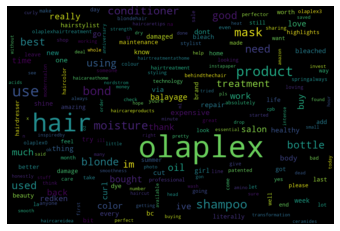

In [41]:
# most common tweet content keywords for positive Olaplex
b = 'olaplex_good'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(olaplex_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

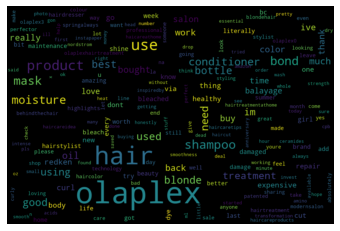

In [42]:
# most common tweet content keywords for negative Olaplex
b = 'olaplex_bad'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(olaplex_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [43]:
# most retweeted content
retweet_olaplex = df_tweets1.sort_values(by='retweets', ascending=False).head(20)

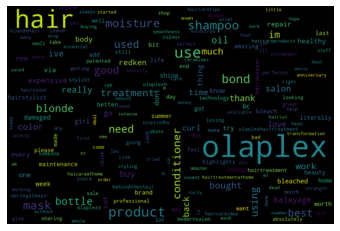

In [44]:
# most common tweet content keywords for negative Olaplex
b = 'retweet_olaplex'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(olaplex_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<h2>Competitive brands</h2>



In [45]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['oribe', 'olaplex', 'r+co', 'dae', 'monday', 'odele', 'prose']

In [46]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,oribe
1,olaplex
2,r+co
3,dae
4,monday
5,odele
6,prose


In [47]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
df_tweets[df_tweets['text_clean'].str.contains("oribe")]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1415,"That depends if his shampoo is from Oribe, Ker...",0,1,EeescalSassy,depends shampoo oribe kerastase kevin murphy b...,0.0,0.0
1650,oribe purple shampoo and conditioner….life saving,0,0,blndsundoll4ket,oribe purple shampoo saving,0.0,0.0


<h3>Brand Sentiment Scores</h3>



In [48]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [58]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,oribe,0.000000
1,olaplex,0.183333
2,r+co,0.266635
3,dae,0.336667
4,monday,0.048765
5,odele,NaN
6,prose,0.250000


<h3>Content Keywords for Olaplex</h3>



In [50]:
# combine all text for a specific brand
def brand_all_text(b):
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains("b")]['text_clean'])

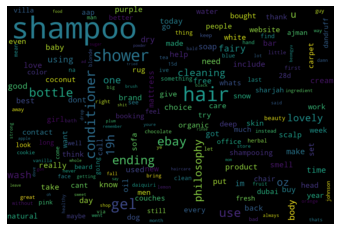

In [51]:
# most common twet content keywords fo Olaplex
b = 'olaplex'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<h3>Content Keywords for Oribe</h3>



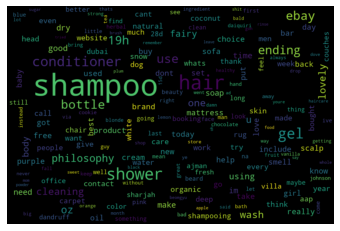

In [52]:
# most common twet content keywords fo Oribe
b = 'oribe'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<h3>Content Keywords for R+Co</h3>



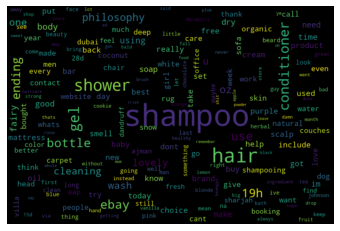

In [53]:
# most common twet content keywords fo R+Co
b = 'r+co'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<h3>Content Keywords for Dae</h3>



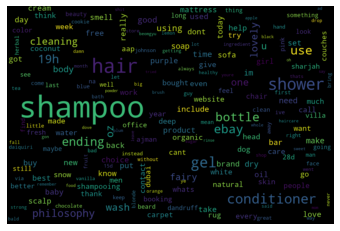

In [54]:
# most common twet content keywords fo Dae
b = 'dae'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<h3>Content Keywords for MONDAY</h3>



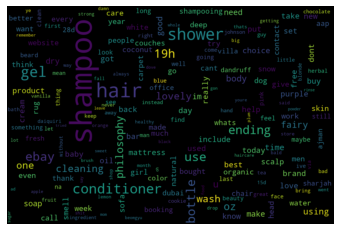

In [55]:
# most common twet content keywords fo MONDAY
b = 'monday'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<h3>Content Keywords for Odele</h3>



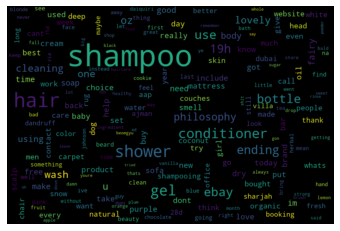

In [56]:
# most common twet content keywords fo Odele
b = 'odele'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<h3>Content Keywords for Prose</h3>



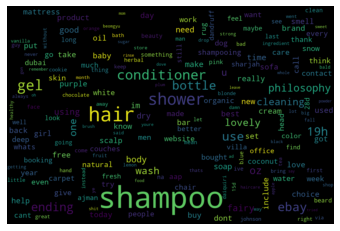

In [57]:
# most common twet content keywords fo Prose
b = 'prose'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()